In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# simplify the package in a short name. Below are the standard names people use for Pandas, Numpy, seaborn and matplotlib.pyplot
# import a new library
import datetime
#import seaborn as sns
from common.utils import load_data

In [46]:
crimes2 = load_data('C:/Users/ghazwan/Pictures/last test/2017/hourly/','es_bi_lstm_all2_2017XL'+'.csv')
crimes2.head()

,Unnamed: 0,h,prediction,actual
2017-01-01 22:00:00,0,t+1,36.654627,38.0
2017-01-01 23:00:00,1,t+1,29.864814,24.0
2017-01-02 00:00:00,2,t+1,32.065574,23.0
2017-01-02 01:00:00,3,t+1,31.575773,19.0
2017-01-02 02:00:00,4,t+1,28.157151,14.0


In [64]:
crimes2.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=8688)

In [94]:
crimes=crimes2[(crimes2.index.month >= 1) & (crimes2.index.month <= 1)]
crimes

,Unnamed: 0,h,prediction,actual
2017-01-01 22:00:00,0,t+1,36.654627,38.0
2017-01-01 23:00:00,1,t+1,29.864814,24.0
2017-01-02 00:00:00,2,t+1,32.065574,23.0
2017-01-02 01:00:00,3,t+1,31.575773,19.0
2017-01-02 02:00:00,4,t+1,28.157151,14.0
...,...,...,...,...
2017-01-31 19:00:00,717,t+1,37.968033,30.0
2017-01-31 20:00:00,718,t+1,28.054403,25.0
2017-01-31 21:00:00,719,t+1,21.291871,20.0
2017-01-31 22:00:00,720,t+1,31.986808,15.0


In [95]:
a = crimes2.index.to_period('Y')
b = crimes2.index.hour
df1 = crimes2.groupby([a,b])[['actual']].sum()
#http://stackoverflow.com/questions/17118071/python-add-leading-zeroes-using-str-format 
df1.index = df1.index.map(lambda x: '{0[0]} {0[1]:0>2}:00:00'.format(x))
print (df1)

                actual
2017 00:00:00   8047.0
2017 01:00:00   6776.0
2017 02:00:00   5615.0
2017 03:00:00   4962.0
2017 04:00:00   3834.0
2017 05:00:00   4253.0
2017 06:00:00   6695.0
2017 07:00:00  10725.0
2017 08:00:00  11830.0
2017 09:00:00  12633.0
2017 10:00:00  12983.0
2017 11:00:00  17722.0
2017 12:00:00  15001.0
2017 13:00:00  16870.0
2017 14:00:00  18197.0
2017 15:00:00  17512.0
2017 16:00:00  18082.0
2017 17:00:00  17989.0
2017 18:00:00  16410.0
2017 19:00:00  15757.0
2017 20:00:00  13642.0
2017 21:00:00  12420.0
2017 22:00:00  11095.0
2017 23:00:00  12681.0


In [96]:
a = crimes2.index.to_period('Y')
b = crimes2.index.hour
df2 = crimes2.groupby([a,b])[['prediction']].sum()
#http://stackoverflow.com/questions/17118071/python-add-leading-zeroes-using-str-format 
df2.index = df2.index.map(lambda x: '{0[0]} {0[1]:0>2}:00:00'.format(x))
print (df2)

                 prediction
2017 00:00:00  10769.843119
2017 01:00:00  10438.822916
2017 02:00:00   9342.458507
2017 03:00:00   8734.841152
2017 04:00:00   8751.845095
2017 05:00:00   7779.299670
2017 06:00:00   7591.706877
2017 07:00:00   7294.817137
2017 08:00:00   8269.447592
2017 09:00:00   9250.213141
2017 10:00:00  12693.662726
2017 11:00:00  11165.925147
2017 12:00:00  13378.878167
2017 13:00:00  14679.575158
2017 14:00:00  15886.460893
2017 15:00:00  14078.704474
2017 16:00:00  13450.723018
2017 17:00:00  17833.532361
2017 18:00:00  20714.839849
2017 19:00:00  15315.805382
2017 20:00:00  12466.771708
2017 21:00:00  10182.044369
2017 22:00:00  12953.690368
2017 23:00:00   9668.382515


In [97]:
df3 = crimes.groupby(crimes.index.strftime('%Y-%m %H:%M:%S'))[['actual']].sum()
df4 = crimes.groupby(crimes.index.strftime('%Y-%m %H:%M:%S'))[['prediction']].sum()

<AxesSubplot:>

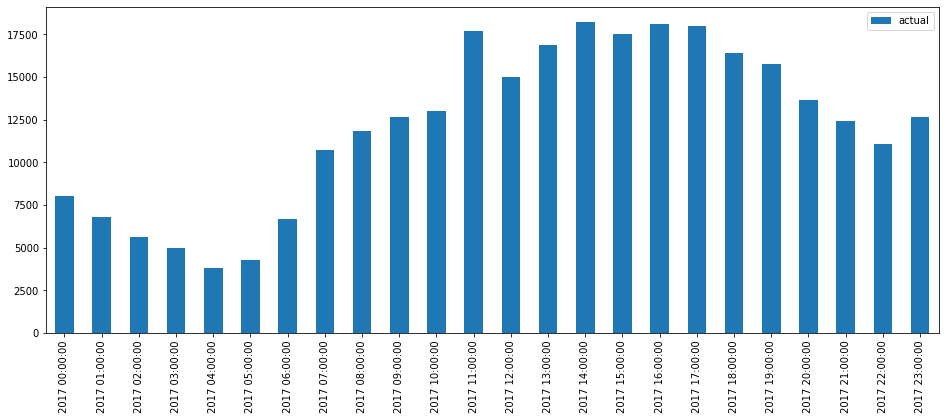

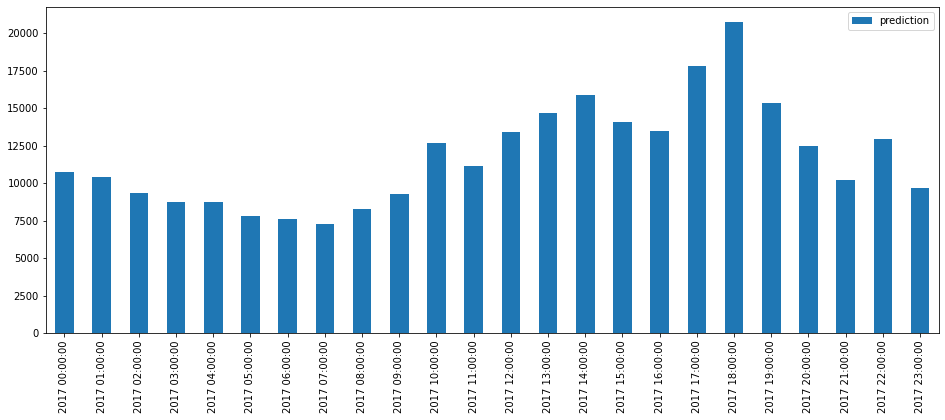

In [98]:
df1.plot(kind='bar',figsize=[16,6])
df2.plot(kind='bar',figsize=[16,6])

In [99]:
df1

,actual
2017 00:00:00,8047.0
2017 01:00:00,6776.0
2017 02:00:00,5615.0
2017 03:00:00,4962.0
2017 04:00:00,3834.0
2017 05:00:00,4253.0
2017 06:00:00,6695.0
2017 07:00:00,10725.0
2017 08:00:00,11830.0
2017 09:00:00,12633.0


Text(0, 0.5, 'Pies Consumed')

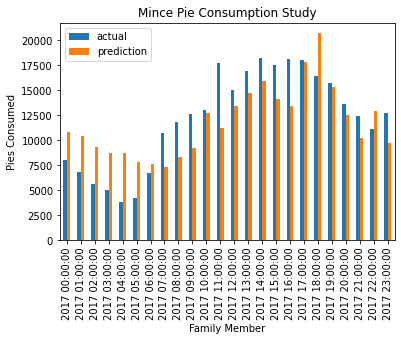

In [100]:
plotdata = pd.DataFrame({
    "actual":df1['actual'],
    "prediction":df2['prediction'],
    
    }, 
    index=df1.index
)
plotdata.plot(kind="bar")
plt.title("Mince Pie Consumption Study")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

Text(0, 0.5, 'Pies Consumed')

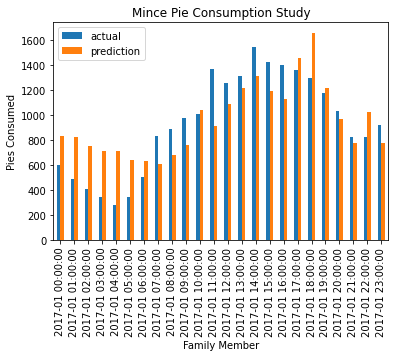

In [101]:
plotdata = pd.DataFrame({
    "actual":df3['actual'],
    "prediction":df4['prediction'],
    
    }, 
    index=df3.index
)
plotdata.plot(kind="bar")
plt.title("Mince Pie Consumption Study")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

In [72]:
a = crimes2.index.to_period('Y')
b = crimes2.index.hour
df1 = crimes2.groupby([a,b])[['prediction']].sum()
#http://stackoverflow.com/questions/17118071/python-add-leading-zeroes-using-str-format 
df1.index = df1.index.map(lambda x: '{0[0]} {0[1]:0>2}:00:00'.format(x))
print (df1)

                 prediction
2017 00:00:00  10769.843119
2017 01:00:00  10438.822916
2017 02:00:00   9342.458507
2017 03:00:00   8734.841152
2017 04:00:00   8751.845095
2017 05:00:00   7779.299670
2017 06:00:00   7591.706877
2017 07:00:00   7294.817137
2017 08:00:00   8269.447592
2017 09:00:00   9250.213141
2017 10:00:00  12693.662726
2017 11:00:00  11165.925147
2017 12:00:00  13378.878167
2017 13:00:00  14679.575158
2017 14:00:00  15886.460893
2017 15:00:00  14078.704474
2017 16:00:00  13450.723018
2017 17:00:00  17833.532361
2017 18:00:00  20714.839849
2017 19:00:00  15315.805382
2017 20:00:00  12466.771708
2017 21:00:00  10182.044369
2017 22:00:00  12953.690368
2017 23:00:00   9668.382515


In [19]:
crimes2['timestamp'] = pd.to_datetime(crimes2['timestamp'], format='%y/%m/%d H:%M:%S', infer_datetime_format=True)
crimes1['timestamp'] = pd.to_datetime(crimes1['timestamp'], format='%y/%m/%d H:%M:%S', infer_datetime_format=True)

In [9]:
crimes2['timestamp'].dt.hour

0       22
1       23
2        0
3        1
4        2
        ..
8683    17
8684    18
8685    19
8686    20
8687    21
Name: timestamp, Length: 8688, dtype: int64

array([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21], dtype=int64)

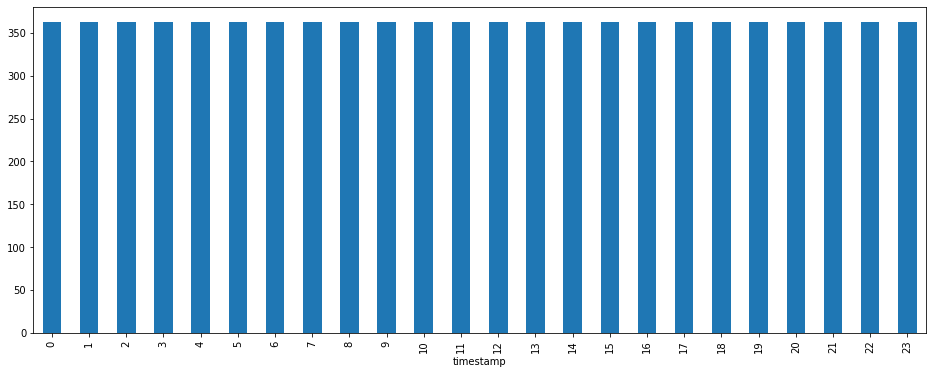

In [39]:
NoOfYear=crimes2.groupby(crimes2['timestamp'].dt.hour)['actual'].agg('count')
NoOfYear.plot(kind='bar',figsize=[16,6])
boro_cries = crimes2['timestamp'].dt.hour.unique()
boro_cries

In [30]:
feb_TLC_Destination_starthour= crimes2.groupby(
    ['timestamp']).count().reset_index()
feb_TLC_Destination_starthour

,timestamp,Unnamed: 0,h,prediction,actual
0,2017-01-01 22:00:00,1,1,1,1
1,2017-01-01 23:00:00,1,1,1,1
2,2017-01-02 00:00:00,1,1,1,1
3,2017-01-02 01:00:00,1,1,1,1
4,2017-01-02 02:00:00,1,1,1,1
...,...,...,...,...,...
8683,2017-12-29 17:00:00,1,1,1,1
8684,2017-12-29 18:00:00,1,1,1,1
8685,2017-12-29 19:00:00,1,1,1,1
8686,2017-12-29 20:00:00,1,1,1,1


In [35]:
##Origin (Arriving Pax)
#Groupby Day of Week
feb_TLC_Origin_weekday=( crimes2
    .groupby(
    ['timestamp']).count().reset_index()
    .sort_values('timestamp', ascending=True)
)
feb_TLC_Origin_weekday

,timestamp,Unnamed: 0,h,prediction,actual
0,2017-01-01 22:00:00,1,1,1,1
1,2017-01-01 23:00:00,1,1,1,1
2,2017-01-02 00:00:00,1,1,1,1
3,2017-01-02 01:00:00,1,1,1,1
4,2017-01-02 02:00:00,1,1,1,1
...,...,...,...,...,...
8683,2017-12-29 17:00:00,1,1,1,1
8684,2017-12-29 18:00:00,1,1,1,1
8685,2017-12-29 19:00:00,1,1,1,1
8686,2017-12-29 20:00:00,1,1,1,1


In [24]:
NoOfYear

timestamp
0     362
1     362
2     362
3     362
4     362
5     362
6     362
7     362
8     362
9     362
10    362
11    362
12    362
13    362
14    362
15    362
16    362
17    362
18    362
19    362
20    362
21    362
22    362
23    362
Name: actual, dtype: int64

<AxesSubplot:xlabel='timestamp'>

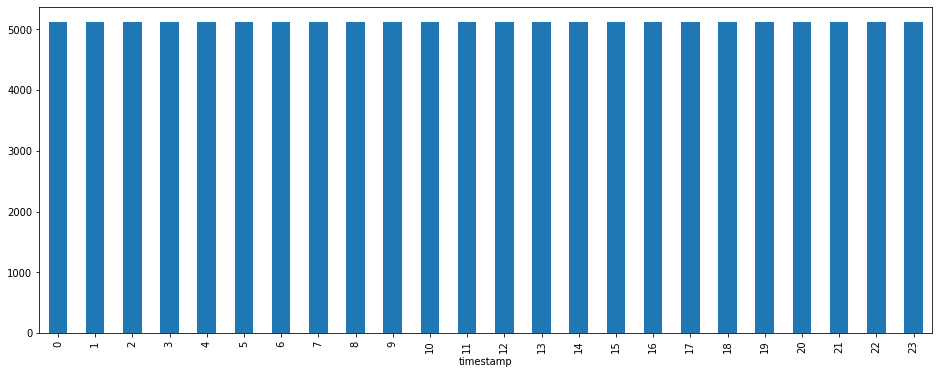

In [21]:
NoOfYear=crimes1.groupby(crimes1['timestamp'].dt.hour)['timestamp'].agg('count')
NoOfYear.plot(kind='bar',figsize=[16,6])